# Maximum Likelihood Estimation

In this notebook, we will see what Maximum Likelihood Estimation is and how it can be used. 

**Contents**:
- **[1. Introduction](#introduction)**
- **[2. Mathematical Formulation](#math-formulation)**
- **[3. Difference between Probability and Likelihood](#probability-likelihood)**
- **[4. Probability Distributions, Estimations and Codes](#distributions)**
    - **[4.1 Bernoulli Distribution](#bernoulli)**
    - **[4.2 Binomial Distribution](#binomial)**
    - **[4.3 Poisson Distribution](#poisson)**
    - **[4.4 Exponential Distribution](#exponential)**
    - **[4.5 Normal Distribution](#normal)**
- **[5. Summary](#summary)**
- **[6. References](#references)**
---

## <a id="introduction">1. Introduction</a>

We often need to study populations for various purposes such as understanding its characteristics, for finding patterns and to devise better solutions using these information. However, for large populations, it is neither possible nor feasible to examine each individual in a population to understand these properties and characteristics. Hence, the statisticians make use of random sampling. The measurements are, therefore, made on much smaller samples for analysis and drawing conclusions about the population.

Analysing the data becomes a lot more easier if we are able to identify distribution of the population, using the sample. Any probability distribution is uniquely defined by some parameters. Therefore, if we somehow find/identify these parameters, we can easily study the population. This process of finding parameters for the population by analysing the samples from that population is called **estimation**.

We can say that whenever our estimation is good, on random sampling again, we are **likelier** to obtain a sample which would be very similar to our original sample. In other words, more the chances of getting a similar sample with our estimates of the parameters, more is the **likelihood** that our estimation is satisfactorily correct.

**Maximum likelihood estimation** is basically the process of estimating these parameters based on our sample, such that the likelihood of the population to be defined with those parameters is maximised.

---

## <a id="math-formulation">2. Mathematical Formulation</a>

Now that we have a gist of the problem we are trying to solve here, let's define it more formally.

Suppose we have obtained a random sample from our population, given by $x_1, \ x_2, \ x_3, \ ..., \ x_n$. <br>
Now, using this sample, we want to assume some distribution for our population. Let that distribution be defined as $D(\theta)$, <br>
where $\theta = [\theta_1 \ \theta_2 \ \theta_3 \ ... \ \theta_k]^T$ is the vector defining the parameters for our assumed distribution $D$. 

Now, using our random sample, we want to determine the values of $\theta$ which will make our distribution $D$ most likely to define our population. In order to quantify how likely it is for our assumed distribution $D$ with its estimated parameters $\theta$ to define the population, we make use of **likelihood function**.

We define the likelihood function,
    $L : \{\theta, \ x_1, \ x_2, \ x_3, \ ..., \ x_n\} \longrightarrow \rm I\!R_0^+$ as follows: <br>

$$
    \begin{align}
        L(\theta \ | \ x_1, \ x_2, \ x_3, \ ..., \ x_n) 
            & = P(X_1 = x_1,X_2 = x_2,X_3 = x_3, \ ..., \ X_n = x_n) \\
        & = f(x_1 | \theta)\ .\ f(x_2 | \theta)\ .\ f(x_3 | \theta)\ .\ ...\ .\ f(x_n | \theta) \\
        & = \prod_{i = 1}^n f(x_i | \theta)
    \end{align}
$$

Here, $f$ is the probability mass/density function for our distribution $D$.

**Note**: Since the sample is selected randomly from a large population, we can assume that selection of a datum into the sample is **independent** from selection of any other datum. This assumption of independence allows us to multiply the probability mass/density functions for each datum to calculate the overall likelihood.

The **goal** of **Maximum Likelihood Estimation** is to find $\theta$ such that the likelihood function value gets maximised. For any likelihood function which is **concave**, or **negatively convexed**, we can find its maximum likelihood estimate by equating the first partial derivatives w.r.t. each parameter $\theta_j, \forall j \in \{1, 2, 3, \ ..., \ k\}$ to $0$. As we will see later, for commonly occuring probability distributions, the likelihood functions are indeed concave.

$$
    \begin{align}
        \therefore \ \theta 
            & = \mbox{arg} \ \max_{\theta \ \in \ \Theta} \  L(\theta \ | \ x_1, x_2, x_3, \ ..., \ x_n) \\
        \Longrightarrow \ \theta_j 
            & = \mbox{arg} \left( \frac{\partial L}{\partial \theta_j} = 0 \right) 
            \ \forall \ j \in \{1, \ 2, \ 3, \ ..., \ k\} \ | \ \mbox{L is concave}
    \end{align}
$$

Equating partial derivatives to $0$ would be difficult here because product of probability mass/density function for all the elements of the sample would require extended application of chain rule.
Hence, we make use of **logarithm function**. Logarithm function is monotonically strictly increasing function. Therefore, wherever $L$ will maximise, at the same parameter values, $\log(L)$ will also maximize. Therefore, instead of maximising the likelihood estimation, we maximise the **log likelihood estimation**.

$$
\begin{align}
    L(\theta \ | \ x_1, x_2, x_3, \ ..., \ x_n) & = \prod_{i = 1}^n f(x_i \ | \ \theta) \\
    \Longrightarrow \log\left(L(\theta \ | \ x_1, x_2, x_3, \ ..., \ x_n)\right) 
        & = \log\left(\prod_{i = 1}^n f(x_i \ | \ \theta)\right) \\
    & = \sum_{i = 1}^n \log\left(f(x_i \ | \ \theta)\right) \\
    \Longrightarrow \frac{\partial}{\partial \theta_j} 
        \log\left(L(\theta \ | \ x_1, x_2, x_3, \ ..., \ x_n)\right)
        & = \sum_{i = 1}^n \frac{\partial}{\partial \theta_j} \log\left(f(x_i \ | \ \theta)\right),
        \ \forall \ j \in \{1, 2, 3, \ ..., \ k\} \\
    & = \sum_{i = 1}^n \frac{1}{f(x_i \ | \ \theta)} \frac{\partial}{\partial \theta_j} f(x_i \ | \ \theta),
        \ \forall \ j \in \{1, 2, 3, \ ..., \ k\} \\
    \therefore \ \mbox{for concave likelihood functions}, \ \theta_j 
        & = \mbox{arg} \left(\sum_{i = 1}^n \frac{1}{f(x_i \ | \ \theta)} \frac{\partial}{\partial \theta_j}
        f(x_i \ | \ \theta) = 0\right), \ \forall \ j \in \{1, 2, 3, \ ..., \ k\} \\
\end{align}
$$

Now that we have seen the way to maximise the likelihood of estimation, let's do this for some probability distributions in the next section.

---

## <a id="probability-likelihood">3. Difference between Probability and Likelihood</a>

In the beginning, one may think probability and likelihood to be the same thing with only thier names different. This is primarily because the mathematical formula for both of these entities are quite similar. So let's see how likelihood is different from probability. 

Roughly speaking, **probability** tells you the **possibility of observing specific results** or outcomes given a **particular distribution**. When we compute probability, we are already aware about the distribution parameters and hence the **distribution is fixed**. Therefore, with the help of probability, we are able to determine how probable it is to obtain the results in consideration for an event.

On the other hand, in likelihood, we deal with the reverse scenario. Likelihood tells you the possibility that something that you have observed is specifically distributed. This means, for the case of **likelihood** calculation, we already have our **results fixed**. In this case, the **the distribution parameters** play the role of **variables**. Therefore, using our results, we try to find how well some particular distribution fits on our results.

Mathematically, <br>
- Probability is described by a function $P : \{x_1, \ x_2, \ x_3, \ ..., \ x_n, \theta\} \longrightarrow [0, 1]$, computed as $P(x_1, \ x_2, \ x_3, \ ..., \ x_n \ | \ \theta)$
- Whereas, likelihood can be written as a function $L : \{x_1, \ x_2, \ x_3, \ ..., \ x_n, \theta\} \longrightarrow \rm I\!R_0^+$, computed as $L(\theta \ | \ x_1, \ x_2, \ x_3, \ ..., \ x_n)$

where, $x_1, \ x_2, \ x_3, \ ..., \ x_n$ are the results/observations, and $\theta$ is the vector of distribution parameters

Let's consider an example to understand this better. <br>
Suppose we are given an exponential distribution with its rate, i.e., $\lambda$ equal to $2$. This is how the probability density function for this distribution will look:

In [1]:
# make matplotlib plots plotted inline with the notebook
%matplotlib inline

# import packages
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as ss

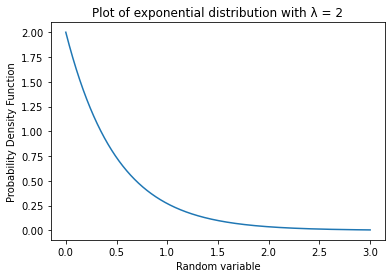

In [2]:
# find 10000 exponentially distributed values between 0 and 3
rate = 2 # lambda
x = np.linspace(0, 3, 10000) # 10000 uniformly spaced values between 0 and 3
y_pdf = ss.expon.pdf(x, scale=(1 / rate)) # scale is inverse of lambda, pdf function returns pdf values

# plot the values to visualise the distribution
# we use semicolons here to hide unwanted lines in the output (just like it happens in MATLAB)
plt.plot(x, y_pdf); # plot x againtst y values
plt.title('Plot of exponential distribution with λ = 2'); # give title to the plot
plt.ylabel('Probability Density Function'); # give y axis label
plt.xlabel('Random variable'); # give x axis label

Now suppose we want to know how likely is it that we'll find a waiting time, $x$, between two successive events as $x \geq 0.75 \wedge x \leq 1.5$ with this distribution. For that, we calculate the probability as $P(0.75 \leq x \leq 1.5 \ | \ \lambda = 2)$. This will be same as finding area under the curve.

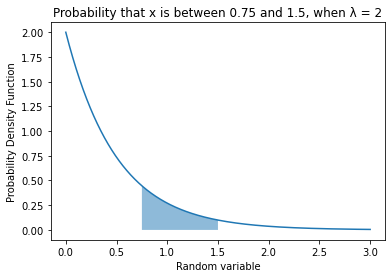

In [3]:
# define the bounds
lower_bound = 0.75
upper_bound = 1.5

mask = (x >= lower_bound) & (x <= upper_bound) # get indices in x with values within these bounds
x_area = x[mask] # get values of x which are between the bounds
y_area = y_pdf[mask] # get corresponding values for the PDF function

plt.plot(x, y_pdf); # plot the PDF
plt.fill_between(x_area, y_area, 0, alpha=0.5); # plot the area under the curve
plt.title('Probability that x is between 0.75 and 1.5, when λ = 2'); # give title to the plot
plt.ylabel('Probability Density Function'); # give y axis label
plt.xlabel('Random variable'); # give x axis label

Now, this area, when calculated, will be equal to equal to $\mbox{CDF}(1.5) - \mbox{CDF}(0.75)$, which is equal to 0.2492 (approx.).

In [4]:
# code to find the probability value:
ss.expon.cdf(upper_bound) - ss.expon.cdf(lower_bound)

0.2492363925925849

In this case, if you would see, we had the value of the distribution parameter, that is $\lambda$ already fixed to $2$. And using those fixed values, we calculated how probable it would be to find observations between $0.75$ and $1.5$.

Now, suppose we already have some results - let's say $x = 0.75$. Now using this, in case of likelihood, we want to evaluate how likely is it that this datum was obtained from a specific distribution. So let's try to first see the likelihood when $\lambda = 2$. For that, we calculate the likelihood as: $L(\lambda = 2 \ | \ x = 0.75) = \mbox{pdf}(x = 0.75 \ | \ \lambda = 2)$.

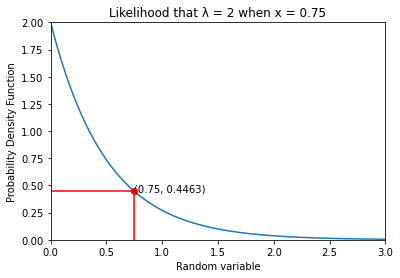

In [5]:
# define the observation and the rate values
observation = 0.75
rate = 2

# compute the likelihood value
likelihood = ss.expon.pdf(observation, scale=(1 / rate))

plt.plot(x, y_pdf); # plot the PDF
plt.plot([0, observation], [likelihood, likelihood], '-r'); # plot the abscissa
plt.plot([observation, observation], [0, likelihood], '-r'); # plot the oordinate
plt.plot([observation], [likelihood], 'or'); # plot the point
plt.annotate(f'({observation}, {round(likelihood, 4)})', xy=(observation, likelihood)); # annotate the point
plt.title('Likelihood that λ = 2 when x = 0.75'); # give title to the plot
plt.ylabel('Probability Density Function'); # give y axis label
plt.xlabel('Random variable'); # give x axis label
plt.xlim(0, 3); # define range on x axis
plt.ylim(0, 2); # define range on y axis

In this case, we can see that likelihood came out to be a single point on the PDF function curve. Hence, the likelihood that $\lambda = 2$ for exponential distribution when $x = 0.75$ is $0.4463$.

Similarly, for $\lambda = 0.5$, the likelihood will be: $0.3436$. <br> 
This means it is likelier that this observation has been drawn from an exponential distribution with rate $= 2$ rather than rate $= 0.5$.

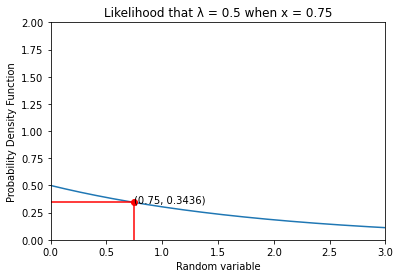

In [6]:
# define the observation and the rate values
observation = 0.75
rate = 0.5

# compute the likelihood value
likelihood = ss.expon.pdf(observation, scale=(1 / rate))

y_pdf = ss.expon.pdf(x, scale=(1 / rate)) # pdf values with scale changed
plt.plot(x, y_pdf); # plot the PDF
plt.plot([0, observation], [likelihood, likelihood], '-r'); # plot the abscissa
plt.plot([observation, observation], [0, likelihood], '-r'); # plot the oordinate
plt.plot([observation], [likelihood], 'or'); # plot the point
plt.annotate(f'({observation}, {round(likelihood, 4)})', xy=(observation, likelihood)); # annotate the point
plt.title('Likelihood that λ = 0.5 when x = 0.75'); # give title to the plot
plt.ylabel('Probability Density Function'); # give y axis label
plt.xlabel('Random variable'); # give x axis label
plt.xlim(0, 3); # define range on x axis
plt.ylim(0, 2); # define range on y axis

---

## <a id="distributions">4. Probability Distributions, Estimations and Codes</a>

Now that we know what maximum likelihood estimation is and how we are supposed to do it, let's use it to estimate distributions for samples taken from some commonly occurring probability distributions.

### <a id="bernoulli">4.1 Bernoulli Distribution</a>

Bernoulli Distribution is a **discrete** distribution which can be used to model a **single yes-no event**. An example of such an event is a coint toss. A coin can either land with heads up, or tails up. Since only two outcomes are possible in a Bernoulli trial, therefore, it has only **one parameter**, i.e., the **probability of obtaining one of the outcomes**. For the other outcome, because of the two outcomes being complementary, the probability for it to occurr is determined automatically.

Mathematically, <br>
A random variable $X$ is said to have a Bernoulli Distribution if, for $x \in X$:

$$
f(x) = \left\{
    \begin{array} \\
        p & \mbox{if } x = 1 \\
        1 - p & \mbox{if } x = 0 \\
        0 & \mbox{otherwise}
    \end{array}
\right.
$$

Here, $f$ is the probability mass function, $p$ is the probability for one of the two possible outcomes to happen, $x = 1$ implies that the first outcome has successfully occurred. Therefore, when $x = 0$, the first outcome has failed to occur which implies that the second outcome has occurred. Hence, the probability mass function can be condensed to the following representation:

$$
    f(x) = p^x(1 - p)^{1 - x}, \ x \in \{0, 1\}
$$

Now let's say we have a sample, $x_1, \ x_2, \ x_3, \ ..., \ x_n$ which we have obtained supposedly from $n$ independent and identical Bernoulli trials. So, we will now need to estimate what parameter $p$, for our assumed Bernoulli Distribution, will best describe our sample. For this, we proceed onto calculating the likelihood.

$$
\begin{align}
    L(p \ | \ x_1, x_2, x_3, \ ..., \ x_n) & = \prod_{i = 1}^n f(x_i \ | \ p) \\
    & = \prod_{i = 1}^n p^{x_i}(1 - p)^{1 - x_i}
\end{align}
$$

Therefore, the log likelihood function would be:

$$
\begin{align}
    \log L(p \ | \ x_1, x_2, x_3, \ ..., \ x_n) 
        & = \log\left(\prod_{i = 1}^n p^{x_i}(1 - p)^{1 - x_i}\right) \\
    & = \sum_{i = 1}^n \log\left(p^{x_i}(1 - p)^{1 - x_i}\right) \\
    & = \sum_{i = 1}^n \log\left(p^{x_i}\right) + \sum_{i = 1}^n \log\left((1 - p)^{1 - x_i}\right) \\
    & = \log(p) \sum_{i = 1}^n x_i + \log(1 - p) \sum_{i = 1}^n (1 - x_i) \\
    \mbox{Let's consider} \ \frac{1}{n}\sum_{i = 1}^n x_i 
        & = c, \ \mbox{where} \ c \ \mbox{is a constant for a given sample, } 
        0 \leq c \leq 1 \mbox{, independent of } p. \\
    \therefore \log L(p \ | \ x_1, x_2, x_3, \ ..., \ x_n) 
        & = n[c\log(p) + (1 - c)\log(1 - p)] \\
\end{align}
$$

Let's try to visualise this function. Since $n$ will only scale the function, we can ignore it for now. Also, the surface plot did not give a representation intuitive enough that the function is concave, so we have made these plots for $c \in \{0.1, 0.5, 0.9\}$ 

In [7]:
# include packages
import numpy as np
import matplotlib.pyplot as plt

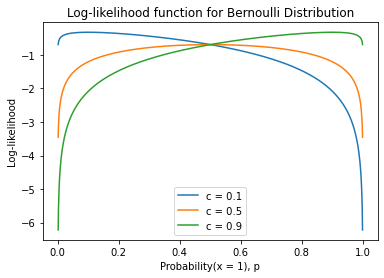

In [8]:
# make arrays for p and c 
p = np.linspace(0.001, 0.999, 1000)
c_s = np.linspace(0.1, 0.9, 3)

# define the figure
fig = plt.figure()
ax = plt.axes()

# plot the log-likelihood function for each value of c
for c in c_s:
    log_likelihood = c * np.log(p) + (1 - c) * np.log(1 - p) # compute log-likelihood function values
    ax.plot(p, log_likelihood, label=f'c = {c}') # plot log-likelihood function

plt.legend() # put legend on plot
plt.xlabel('Probability(x = 1), p') # put x label
plt.ylabel('Log-likelihood') # put y label
plt.title('Log-likelihood function for Bernoulli Distribution') # give title to plot
plt.show() # show the plot

Here we observe that log-likelihood function is concave and we can, therefore, perform maximum likelihood estimation by equating partial derivates of this log-likelihood function w.r.t. $p$ to be $0$.

Partially differentiating log-likelihood function w.r.t. $p$, we get:

$$
\begin{align}
    \frac{\partial}{\partial p}\log L(p \ | \ x_1, x_2, x_3, \ ..., \ x_n)
        & = n\left[c \frac{\partial \log(p)}{\partial p} 
        + (1 - c) \frac{\partial \log(1 - p)}{\partial p}\right] \\
    & = n\left[c \frac{1}{p} - (1 - c) \frac{1}{1 - p}\right] \\
\end{align}
$$

Equating the partial derivative with 0, to find $p$ which gives maximum likelihood, we get:

$$
\begin{align}
    \frac{\partial}{\partial p}\log L(p \ | \ x_1, x_2, x_3, \ ..., \ x_n) & = 0 \\
    \Longrightarrow \frac{c}{p} & = \frac{1 - c}{1 - p} \\
    \Longrightarrow p & = c \\
    \therefore p & = \frac{1}{n} \sum_{i = 1}^n x_i = \bar{x}
\end{align}
$$

Hence, we find that for **MLE of Bernoulli Distribution**, the parameter $p$ should be kept as the **mean of the sample**. Now let's demonstrate this on an example.

In [9]:
# Let actual distribution parameter, p, be uniformly picked between 0 and 1
p = np.random.rand()

N = [1, 10, 100, 1000] # perform MLE with these many points in samples to compare the results
sample = {} # to store the obtained samples

for n in N:
    # Simulate n identical and independent Bernoulli trials
    sample_n = []
    for i in range(n):
        sample_n.append(np.random.binomial(n=1, p=p)) # perform single Bernoulli trial and the result to sample
    sample[n] = sample_n # add sample to dictionary
print(sample[100]) # representation of a sample obtained

[0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0]


In [10]:
# Now, let's try to perform maximum likelihood estimation using these samples.
# We saw that we estimate p to be equal to the sample mean
for n in N:
    p_hat = np.mean(sample[n])
    print(f'For n = %4d, we estimate the parameter p to be {p_hat}' % n)

For n =    1, we estimate the parameter p to be 1.0
For n =   10, we estimate the parameter p to be 0.7
For n =  100, we estimate the parameter p to be 0.61
For n = 1000, we estimate the parameter p to be 0.625


In [11]:
# Now, let's see the actual value of p ;)
print(f'The actual value of p is {p}')

The actual value of p is 0.6330557992009809


From this example, we see that with the help of maximum likelihood estimation, for large samples, we are able to estimate the values of the distribution parameter reasonably well.

---

### <a id="binomial">4.2 Binomial Distribution</a>

Binomial Distribution is a discrete probability distribution which models the **number of successes** in an experiment in which $n$ **Bernoulli trials** were conducted successively and independently, such that probability for success in any of these trials is $p$. For example, number of heads obtained in $10$ coin tosses will be binomially distributed.

Formally,
For a random variable $X \sim \mbox{Bin}(n, p)$ if for $x \in X$, we have:

$$
f(x) = \left\{
    \begin{array} \\
        \frac{n!}{(n - x)! x!} p^x (1 - p)^{n - x} 
            & \mbox{if } x \in \{z \ : \ z \in Z \ \wedge \ 0 \leq z \leq n\} \\
        0 & \mbox{otherwise }
    \end{array}
\right.
$$

where, $f$ is the probability density function.

Now suppose we have a sample $x_1, x_2, x_3, \ ..., \ x_m$, obtained after performing identical experiments $n$ times, and we assume it to come from a binomial distribution. Therefore, its likelihood function and log-likelihood function will be defined as:

$$
L(p \ | \ n, x_1, x_2, x_3, ..., x_m)
$$

### <a id="poisson">4.3 Poisson Distribution</a>

### <a id="exponential">4.4 Exponential Distribution</a>

### <a id="normal">4.5 Normal Distribution</a>

## <a id="summary">5. Summary</a>

## <a id="references">6. References</a>

The following sources were referred while making this notebook:
- [Maximum Likelihood Estimation, STAT 415 - Introduction to Mathematical Statistics, PennState](https://online.stat.psu.edu/stat415/lesson/1/1.2)
- [Maximum-likelihood (ML) Estimation, STAT 504 - Analysis of Discrete Data, PennState](https://online.stat.psu.edu/stat504/node/28/)
- [Parameter Estimation, Chris Piech and Mehran Sahami, Stanford University](https://web.stanford.edu/class/cs109/reader/11%20Parameter%20Estimation.pdf)
- [Maximum Likelihood Estimation, Wikipedia](https://en.wikipedia.org/wiki/Maximum_likelihood_estimation)
- [Probability Concepts Explained: Maximum Likelihood Estimation, towards data science](https://towardsdatascience.com/probability-concepts-explained-maximum-likelihood-estimation-c7b4342fdbb1)
- [StatQuest: Maximum Likelihood, clearly explained!!!, StatQuest with Josh Starmer](https://youtu.be/XepXtl9YKwc)
- [StatQuest: Probability vs Likelihood, StatQuest with Josh Starmer](https://youtu.be/pYxNSUDSFH4)
- [Maximum Likelihood for the Binomial Distribution, Clearly Explained!!!, StatQuest with Josh Starmer](https://youtu.be/4KKV9yZCoM4)
- [Maximum Likelihood for the Exponential Distribution, Clearly Explained! V2.0, StatQuest with Josh Starmer](https://youtu.be/p3T-_LMrvBc)
- [Maximum Likelihood For the Normal Distribution, step-by-step!, StatQuest with Josh Starmer](https://youtu.be/Dn6b9fCIUpM)